In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: 0.43235344898880246, 4: -0.4820206167418575, 5: 2, 6: -0.19882217559177395, 7: 0.3399720188720524, 8: -0.07216942511751556, 9: 0.08345151079083324, 10: 0.26537747741137974, 11: -0.3857171987800241, 12: -0.1823031850444613, 13: -0.16797509338220695, 14: -0.043501041802163076, 15: 0.41587740521315897, 16: -0.03200403790353945, 17: -0.2741224448055638, 18: 0.051431110831267834, 19: 0.398155523896743, 20: -0.12682040162921582}


D:\Github\smlm-dl\smlm_dl\dataset.py:222: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


102:	 [id = 102.000,], [x = 4.024,], [y = 3.515,], [z = -5.764,], [A = 1965.347,], [bg = 99.418,],
117:	 [id = 117.000,], [x = -1.397,], [y = 5.520,], [z = -7.647,], [A = 877.726,], [bg = 74.571,],
118:	 [id = 118.000,], [x = 6.017,], [y = 0.408,], [z = -2.979,], [A = 1430.221,], [bg = 41.297,],
3:	 [id = 3.000,], [x = 4.210,], [y = 2.091,], [z = 6.471,], [A = 1147.495,], [bg = 74.722,],
109:	 [id = 109.000,], [x = 2.521,], [y = -5.997,], [z = 7.140,], [A = 1507.667,], [bg = 67.234,],
122:	 [id = 122.000,], [x = -2.867,], [y = -1.421,], [z = 3.850,], [A = 1274.711,], [bg = 41.157,],
24:	 [id = 24.000,], [x = 5.250,], [y = 7.120,], [z = -5.504,], [A = 829.734,], [bg = 32.585,],
6:	 [id = 6.000,], [x = 10.594,], [y = -10.651,], [z = 0.419,], [A = 1022.909,], [bg = 92.493,],
60:	 [id = 60.000,], [x = -8.525,], [y = -7.242,], [z = 5.098,], [A = 756.781,], [bg = 4.445,],
77:	 [id = 77.000,], [x = -7.708,], [y = -2.532,], [z = -2.168,], [A = 804.165,], [bg = 25.162,],
25:	 [id = 25.000,], [x

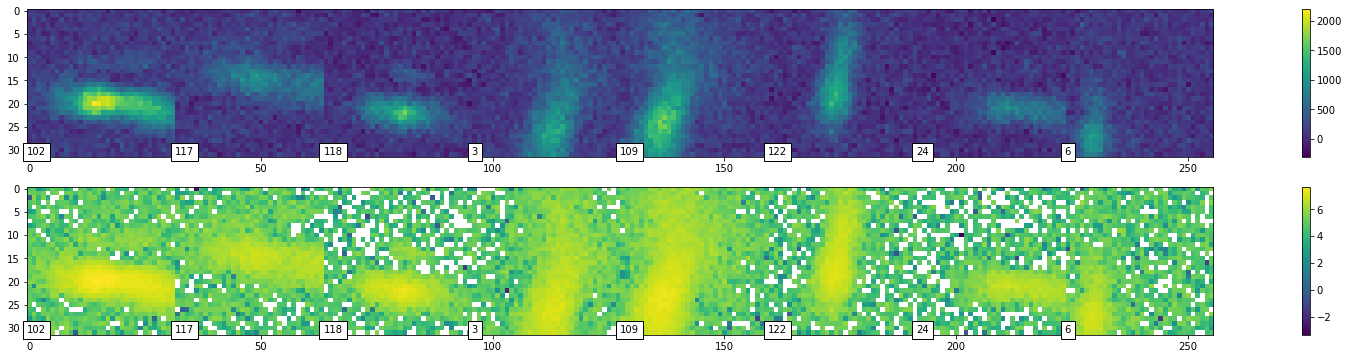

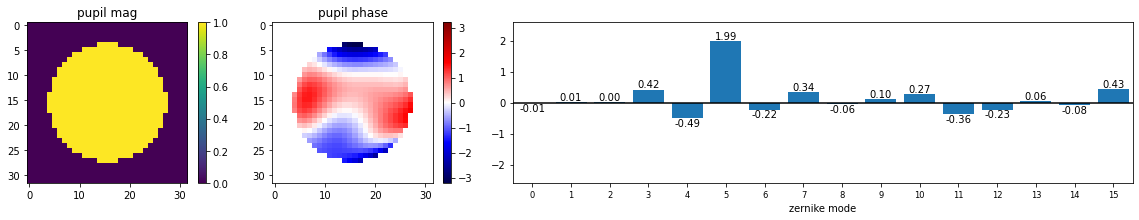

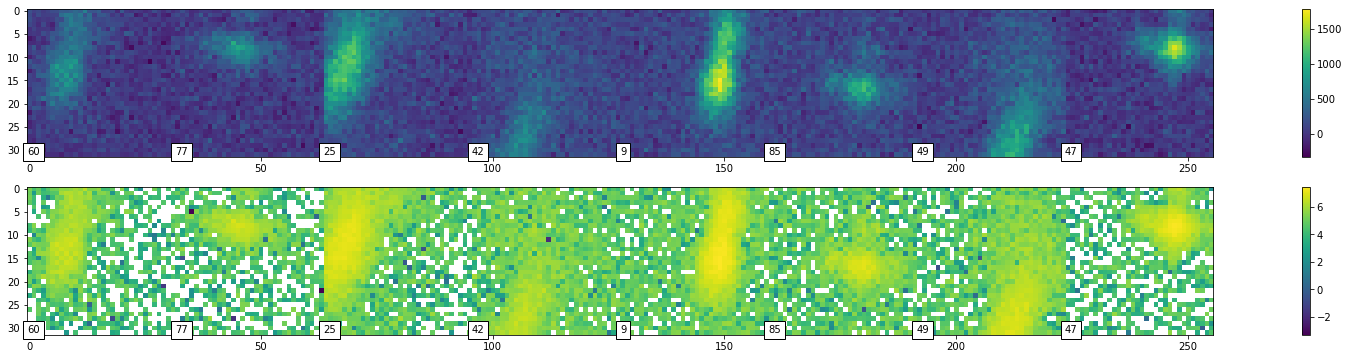

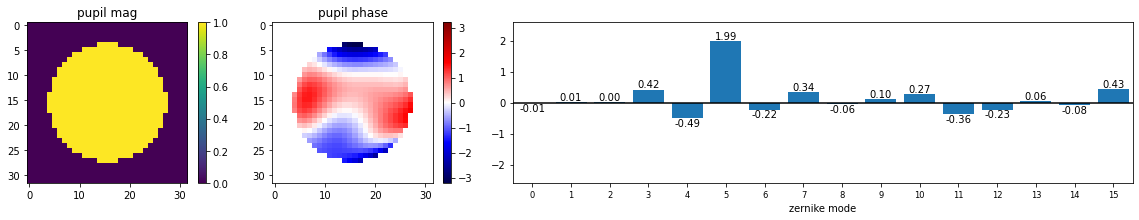

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_18-55-55_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 141072.375000
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 161806.156250
****************************************************************************************************
Validation, average loss = 138564.718750
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-10_18-55-55_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.scale.weight'])
optimizer_state_dict: dict_keys(['state', 'param_groups'])
loss_function_state_dict: odict_keys([])
log_path: D:\Pytorch\runs\2021-12-10_18-55-55_DESKTOP-7NNT713
epoch: 1
loss: 161806.15625


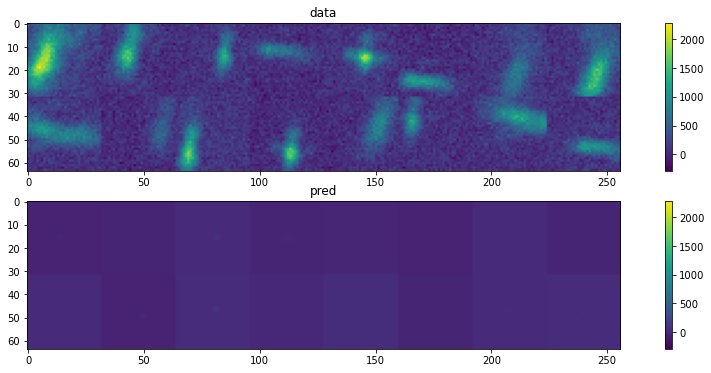

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":len(train_dataloader.dataset)
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
# model.check_model(fitting_model, )

# filepath = training.current_state["log_path"]
# print(filepath)
# training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
# training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
# training.train_data_loader = train_dataloader
# training.valid_data_loader = valid_dataloader
# training.train_and_validate(2, label="test")
# model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_18-55-56_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 141588.437500
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 110706.703125
****************************************************************************************************
Validation, average loss = 100012.625000
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-10_18-55-56_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'en

D:\Github\smlm-dl\smlm_dl\model.py:716: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


D:\Pytorch\runs\2021-12-10_18-55-56_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2021-12-10_18-55-56_DESKTOP-7NNT713\model.ptm, last modified: Fri Dec 10 18:55:56 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─Gaussian2DRenderer: 1-1                --
├─ConvImageEncoderModel: 1-2             --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,514
│    │    └─Sequential: 3-2              13,984
│    │    └─Sequential: 3-3              55,616
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6                  325
Total params: 

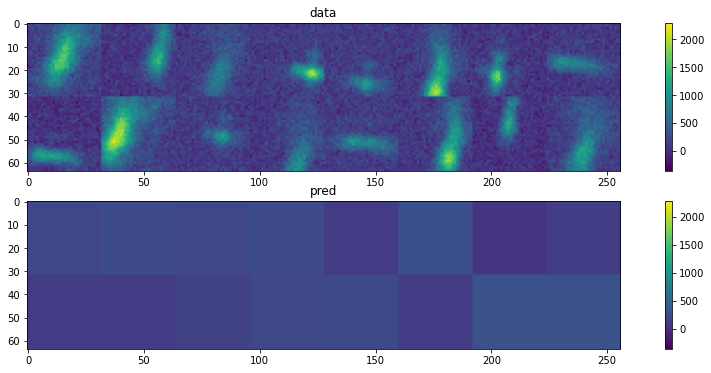

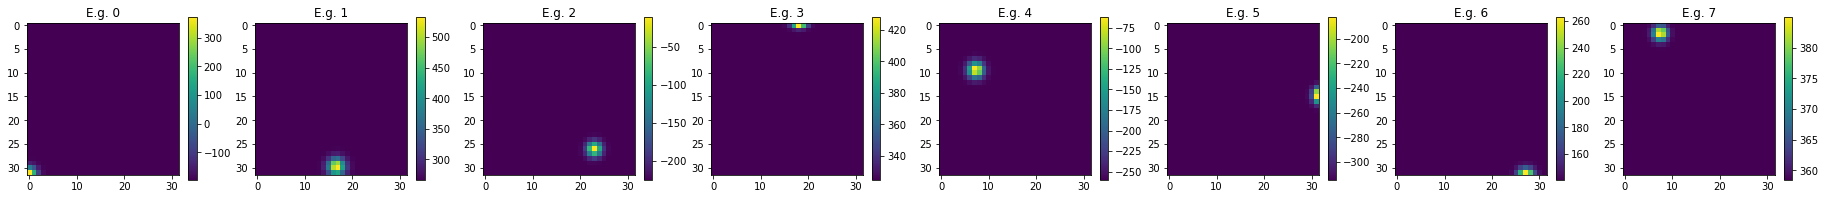

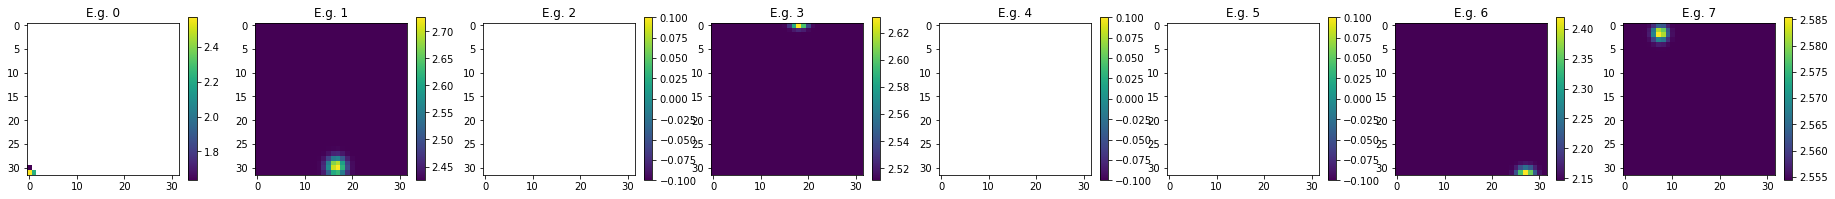

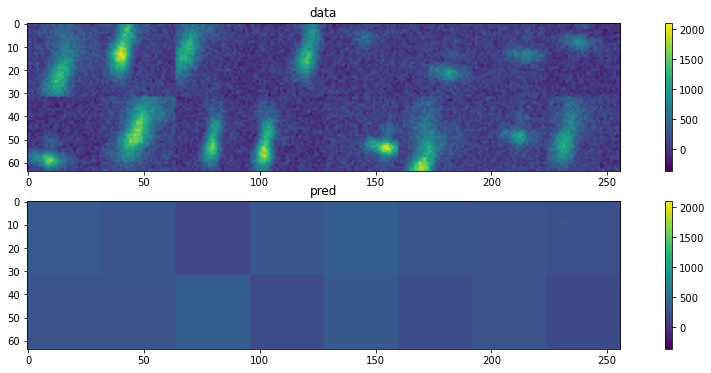

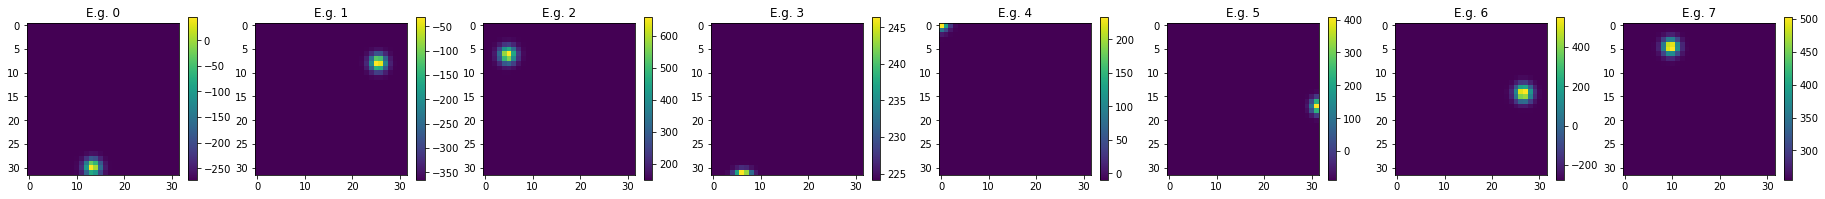

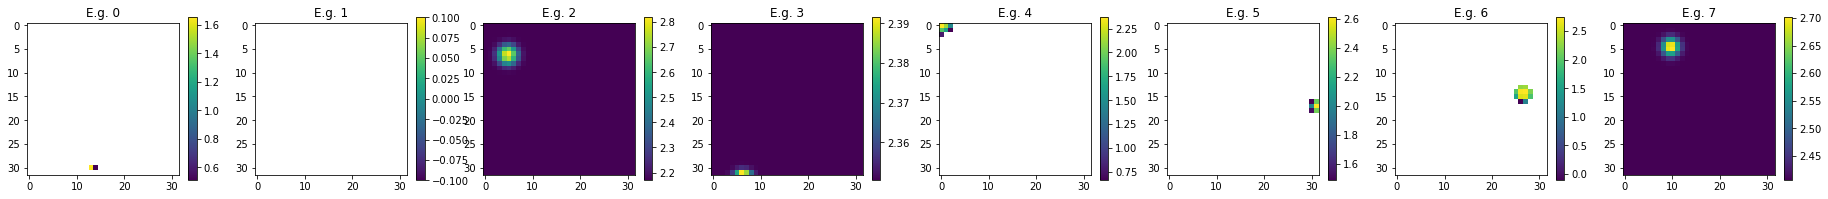

In [4]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_18-56-06_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch # 0, Batch # 1 (128/128), loss = 134967.203125
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 142828.734375
****************************************************************************************************
Validation, average loss = 101951.757812
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-10_18-56-06_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoder

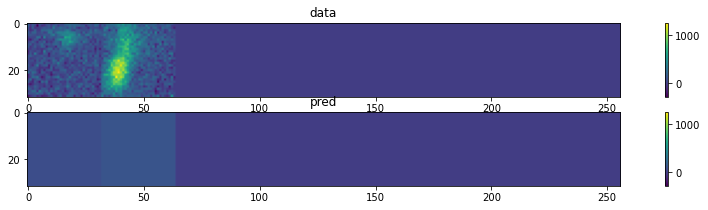

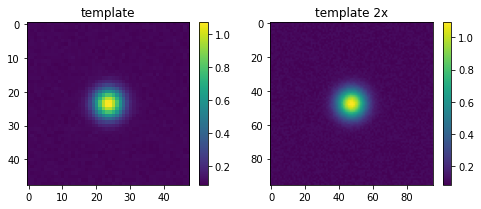

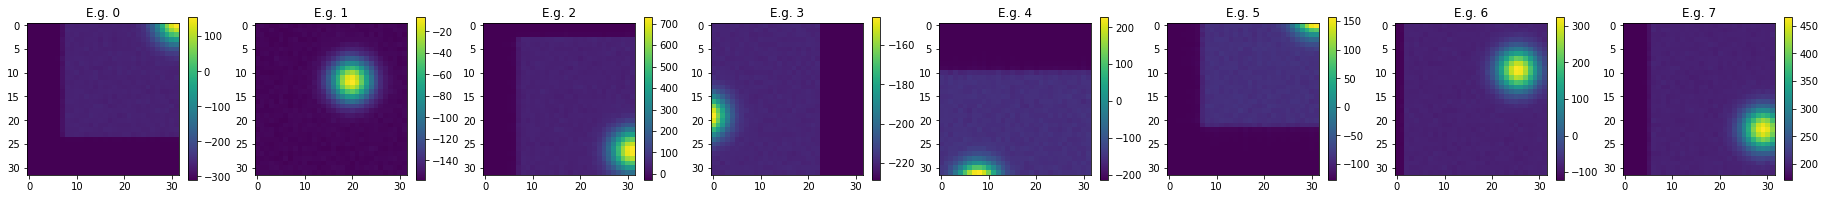

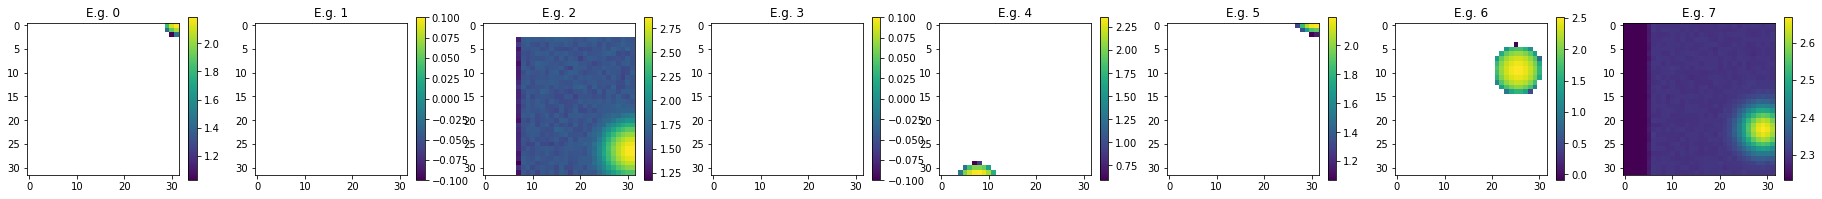

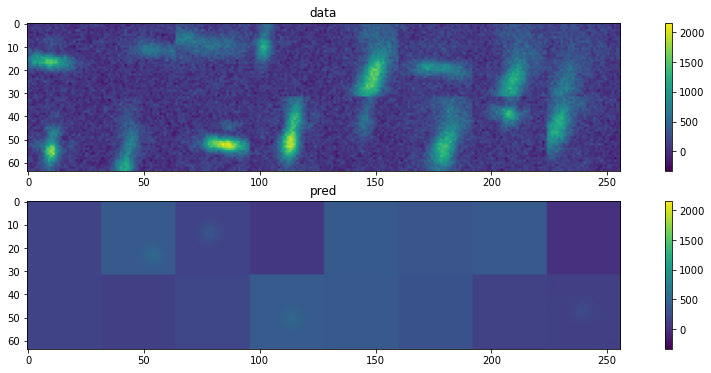

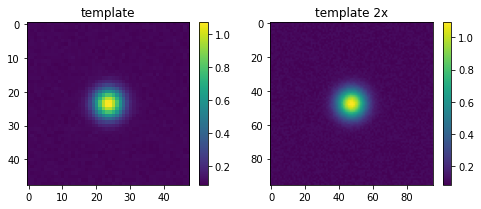

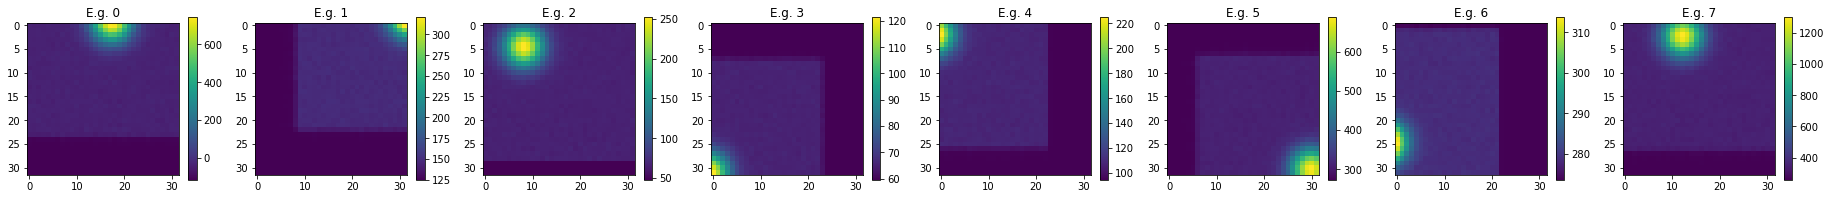

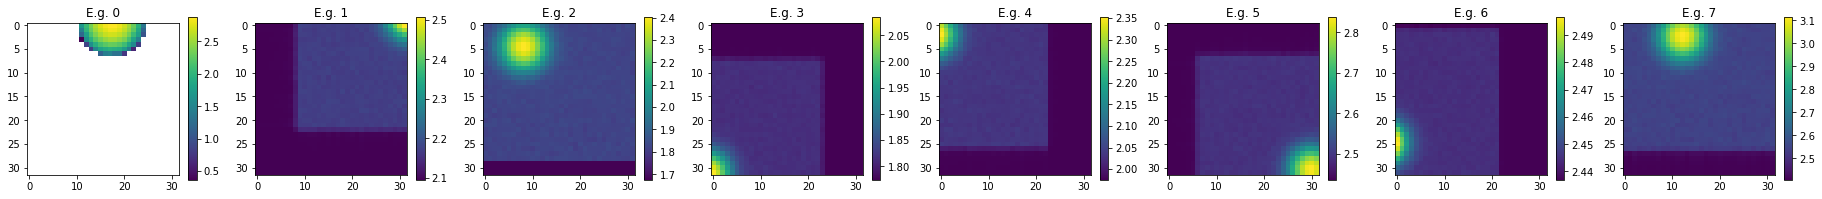

In [5]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_18-56-19_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 143646.656250
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 177666.343750
****************************************************************************************************
Validation, average loss = 135772.750000
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-10_18-56-19_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder

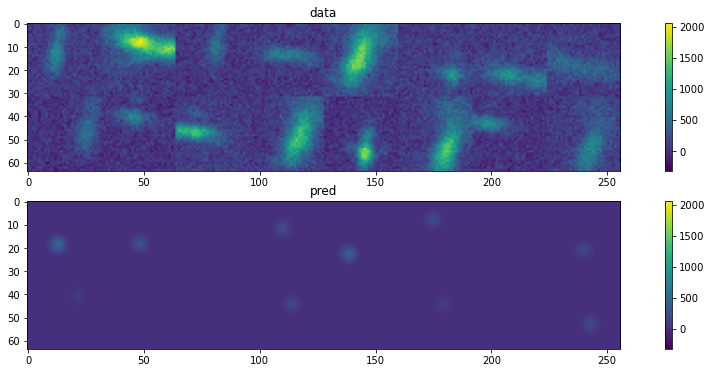

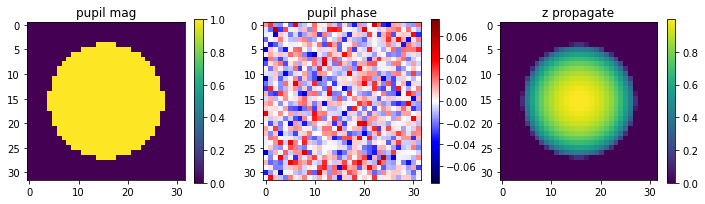

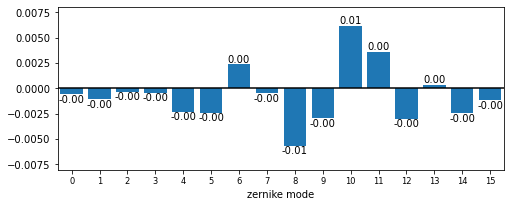

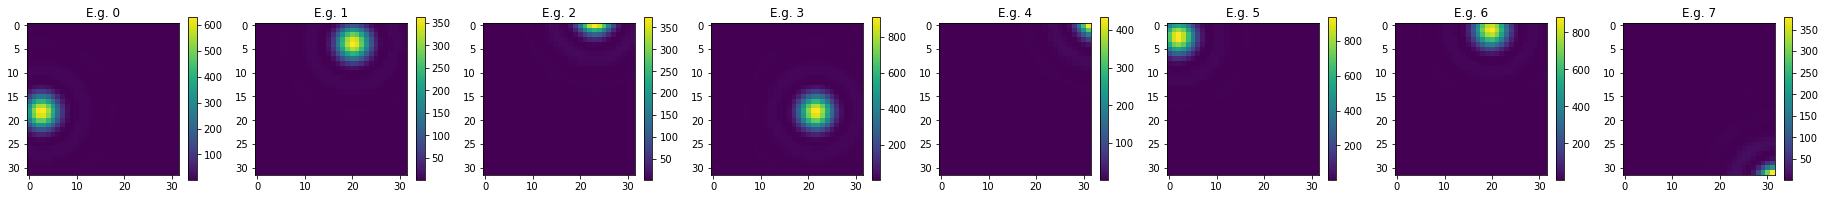

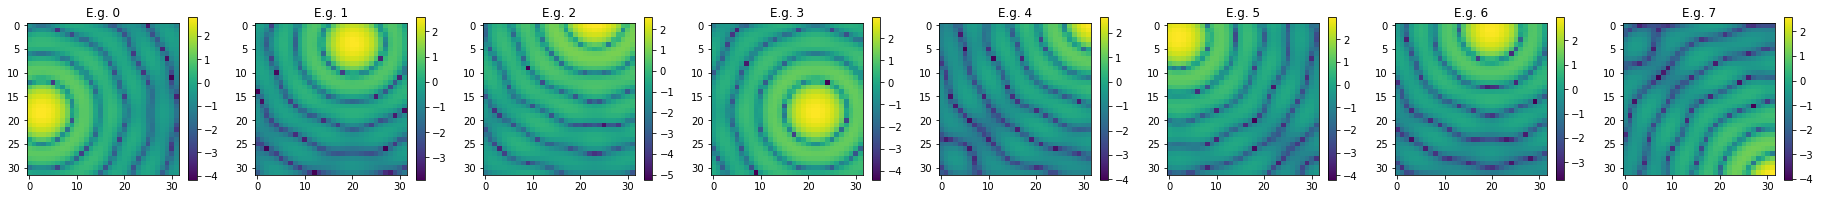

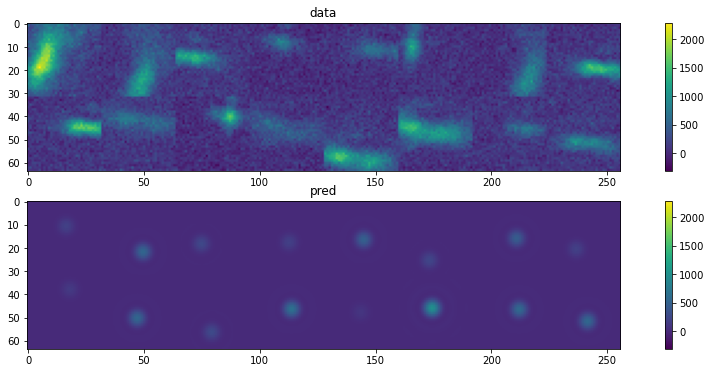

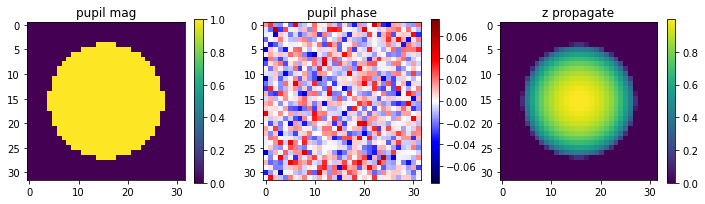

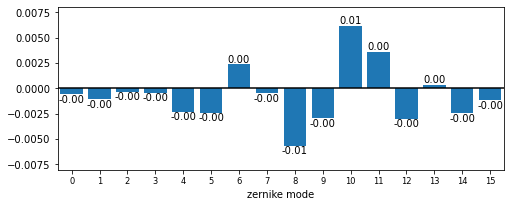

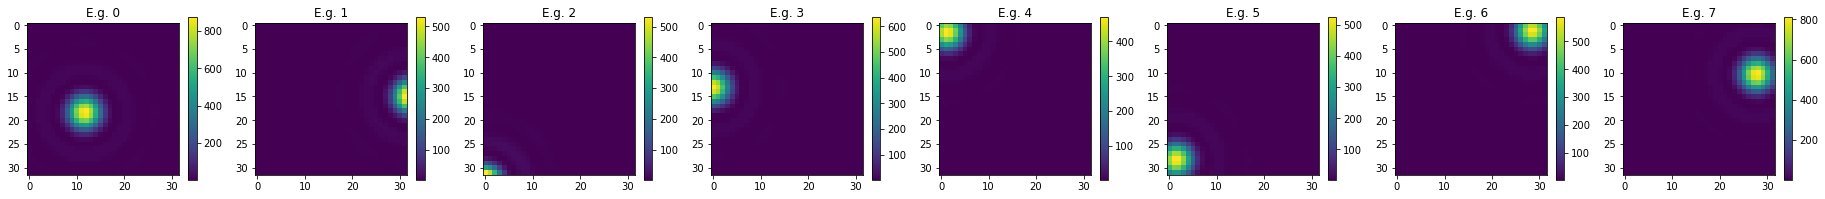

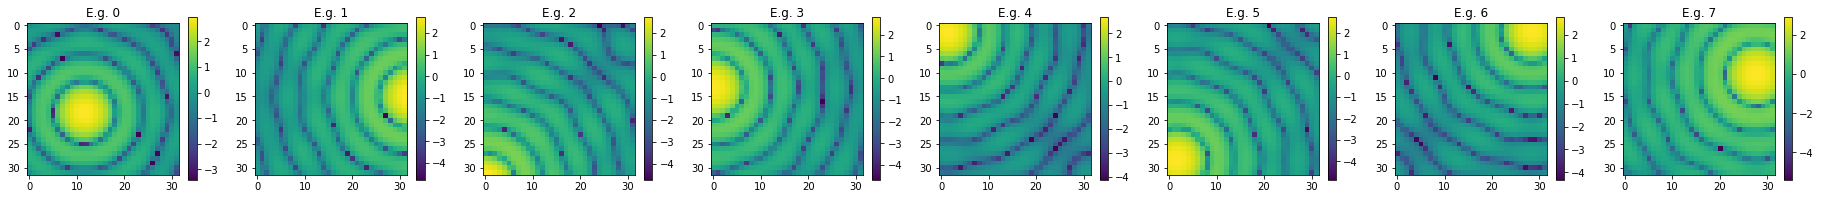

In [6]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )